<a href="https://colab.research.google.com/github/lrnrdr/Prediction-of-Product-Sales/blob/main/Preprocessed_Data_for_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: (Prediction of Product Sales).
- Author: Loraine Rodriguez



## Data Dictionary

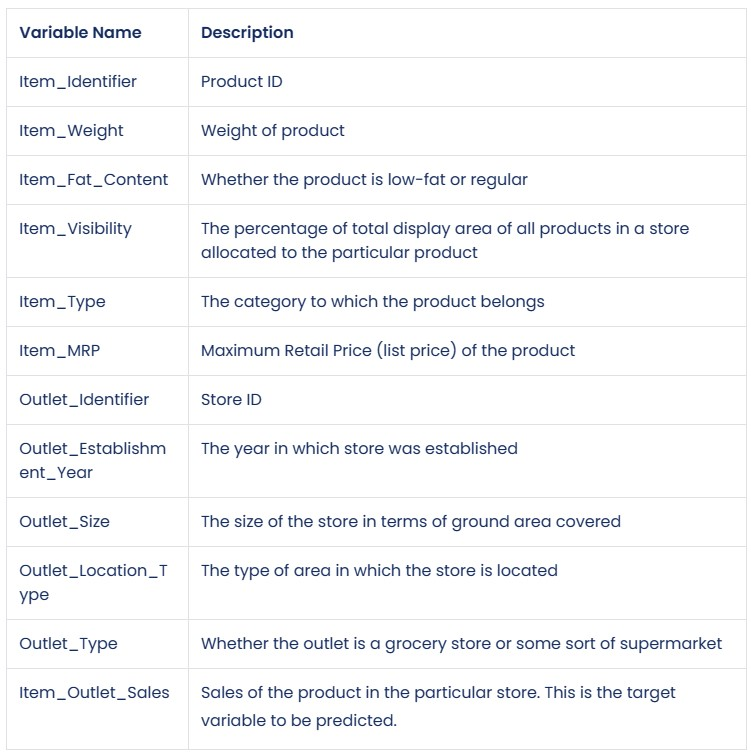

## Data and Imports

Imports

In [4]:
# Numpy
import numpy as np

## Pandas
import pandas as pd

## Warnings
import warnings

# Model Validation Train Test Spit
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline

#  SK Learn Display
from sklearn import set_config

In [5]:
## Set filter warnings to ignore
warnings.filterwarnings('ignore')

In [6]:
## Display all columns
pd.set_option('display.max_column', None)

## Display all rows
pd.set_option('display.max_rows', None)

In [7]:
#  SK Learn Display
set_config(display='diagram')

In [8]:
import pandas as pd
# file path
df = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week01/Data/sales_predictions_2023.csv"
# load in the data
df = pd.read_csv(df)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
## df.info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# **Data Cleaning**

# 3) Are there duplicates? If so, drop any duplicates.

In [10]:
# Check to see if there are any duplicate rows
df.duplicated().sum()

0

- There are no duplicates.

In [ ]:
# Display the sum of missing values
eda_ml.isna().sum().sum()

3873

In [13]:
# Display desriptive statitistics for all collumns
df.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


No inconsistencies noted for Numeric columns

In [14]:
# Display desriptive statitistics for all collumns
df.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


Need to drop Item Identifier high cardinality

In [19]:
# Drop column
df = df.drop(columns=['Item_Identifier'])


In [20]:
# Display desriptive statitistics for all collumns
df.describe(include='object')

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,6113,8523,8523
unique,5,16,10,3,3,4
top,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,5089,1232,935,2793,3350,5577


Verified Item_Identifier dropped

In [21]:
## Create a list of string columns
string_cols = df.select_dtypes('object').columns
string_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [22]:
## Loop through the list of string columns
for col in string_cols:
  ## Print the column name
  print(col)
  ## print the value counts for the column
  print(df[col].value_counts())
  ## Print an empty line for readability
  print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1

In [23]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

- Need to comine Low Fat and LF and low fat columns
- Combine reg and Regular

In [26]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':"Low Fat",'low fat':"Low Fat",'reg':"Regular"})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [31]:
# Display the sum of missing values
df.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The Item_Weight (Numeric) and Outlet_Size (Ordinal) columns are missing values/null.  Will impute in Pipelines.

# Define Target & Features and Train Test Split

In [32]:
# split X and y, we are predicting price
target = 'Item_Outlet_Sales'
X = df.drop(columns=[target]).copy()
y = df[target].copy()

# split training and test

# set random_state to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30 , random_state=42)

In [33]:
X_train.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

# Create the Pipelines and Tuples for Each Group of Columns

## 1. Numeric

In [34]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA

# Save list of number column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)

# Transformers
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

# Pipeline
num_pipeline = make_pipeline(mean_imputer, scaler)
num_pipeline

Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [35]:
# Tuple
numeric_tuple = ('numeric',num_pipeline, num_cols)

## Ordinal pipeline

In [40]:
# PREPROCESSING PIPELINE FOR ORDINAL DATA

# Save list of number column names
ordinal_cols = ['Outlet_Size']

# Ordered Category Lists
Outlet_Size_list = ['Small', 'Medium', 'High']

# Transformers

ord = OrdinalEncoder(categories=[Outlet_Size_list])
freq_imputer = SimpleImputer(strategy='most_frequent')

# scale
scaler2 = StandardScaler()

# Pipeline
ord_pipeline = make_pipeline(freq_imputer, ord, scaler2)

# Tuple
ord_tuple = ('ordinal',ord_pipeline, ordinal_cols)
ord_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'High']])),
                ('standardscaler', StandardScaler())])

Nominal Pipeline

In [42]:
# PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA

# Save list of nominal column names
nominal_cols = X_train.select_dtypes('object').drop(columns=ordinal_cols).columns

# Transformers

missing_imputer = SimpleImputer(strategy='constant', fill_value='missing')
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Pipeline
nom_pipeline = make_pipeline(missing_imputer , ohe)

# Tuple
ohe_tuple = ('categorical',nom_pipeline, nominal_cols)
nom_pipeline


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [43]:
nominal_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [45]:
## Isolate categorical features
cat_cols = X_train.select_dtypes("object").columns
print("Categorical Features:", cat_cols)

## Instantiate the transformers
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

## Define the categorical nominal tuple
ohe_tuple = ('Categorical', ohe, cat_cols)

Categorical Features: Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


# Create Column Transformer to Apply Different Preprocessing to Different Columns

In [46]:
# Instantiate the make column transformer
col_transformer = ColumnTransformer([numeric_tuple,
                                       ord_tuple,
                                       ohe_tuple],
                                       remainder='drop', verbose_feature_names_out=False)

# Fit the Column Transformer on the Training Data Only

In [47]:
# Fit the column transformer on the X_train
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size']),
                                ('Categorical',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

# Transform Both Training and Testing Data

In [ ]:
# Set the default transformation output to Pandas
from sklearn import set_config
set_config(transform_output='pandas')

In [48]:
# Transform the X_train and the X_test
X_train_proc = col_transformer.transform(X_train)
X_test_proc = col_transformer.transform(X_test)